In [ ]:
import numpy as np

Vectors are a type of matrix having only one column or one row.

Vectors come in two flavors: column vectors and row vectors.

For example, matrix **A** is a column vector, and matrix **A'** is a row vector.

$$
A = \begin{pmatrix}
5 \\
4 \\
11
\end{pmatrix}
$$

$$
A^*_{}=\begin{pmatrix}
  5 & 5 & 11
\end{pmatrix}
$$

 # Solve Linear Equation
 Solve a system of three linear equations:

4x + 3y + 2z = 25

-2x + 2y + 3z = -10


3x -5y + 2z = -4

$$
A = \begin{pmatrix}
4&3&2\\
-2&2&3\\
3&-5&2
\end{pmatrix}\quad
X = \begin{pmatrix}
x\\
y\\
z
\end{pmatrix}
\quad
B = \begin{pmatrix}
25\\
-10\\
-4
\end{pmatrix}
$$

**$AX=B$**

**$X=A^{-1}B$**

In [ ]:
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([[25], [-10], [-4]])

print('A =\n{}\n\nB =\n{}'.format(A, B))

A =
[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]

B =
[[ 25]
 [-10]
 [ -4]]


In [ ]:
# implement A inv B to find X
X = np.dot(np.linalg.inv(A), B)
print('X =\n{}'.format(X))

X =
[[ 5.]
 [ 3.]
 [-2.]]


In [ ]:
print('A.X =\n{}'.format(A.dot(X)))
print('B =\n{}'.format(B))

A.X =
[[ 25.]
 [-10.]
 [ -4.]]
B =
[[ 25]
 [-10]
 [ -4]]


## Eigenvalue
Let us find Eigenvalue of a matrix
$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

In [ ]:
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

The numpy.linalg.eig function returns a tuple consisting of a vector **w** eigenvalues and an array **v** corresponding eigenvectors

In [ ]:
w, v = np.linalg.eig(A)
print('eigenvalues =\n{}'.format(w))
print('\neigenvectors =\n{}'.format(v))

eigenvalues =
[-1.03997841  6.80080283 18.23917558]

eigenvectors =
[[ 0.6664281   0.91899137  0.42824655]
 [-0.72658863  0.34150445  0.81440731]
 [ 0.16716024 -0.19705222  0.39159371]]


The eigenvalue w[0] goes with the 0th column of v. The eigenvalue w[1] goes with column 1, etc. To extract the ith column vector, we use



In [ ]:
print('eigenvector_1 = \n{}'.format(v[:,0]))

eigenvector_1 = 
[[ 0.6664281 ]
 [-0.72658863]
 [ 0.16716024]]


Check A.v = w.v

In [ ]:
print('w.v =\n{}'.format(np.dot(w[0],v[:,0])))

w.v =
[[-0.69307083]
 [ 0.75563649]
 [-0.17384304]]


In [ ]:
print('A.v =\n{}'.format(np.dot(A,v[:,0])))

A.v =
[[-0.69307083]
 [ 0.75563649]
 [-0.17384304]]


Determinant of matrix A

In [ ]:
print('Det(A) = {:.2f}'.format(np.linalg.det(A)))

Det(A) = -129.00


# PCA Approach



1.   Take the whole dataset consisting of d-dimensional samples ignoring the class labels

2.   Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)

3. Compute the covariance matrix of the whole data set

4. Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd)

5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix $W$(where every column represents an eigenvector)

6. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: $y=W^T.x$ (where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)

Ref:  http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#6-transforming-the-samples-onto-the-new-subspace

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generating some 3-dimensional sample data
For the following example, we will generate 40 3-dimensional samples randomly drawn from a multivariate Gaussian distribution.

In [ ]:
import numpy as np

np.random.seed(23423)

mu_vec1 = np.array([0,0,0])

cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])


class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,2,3])

cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


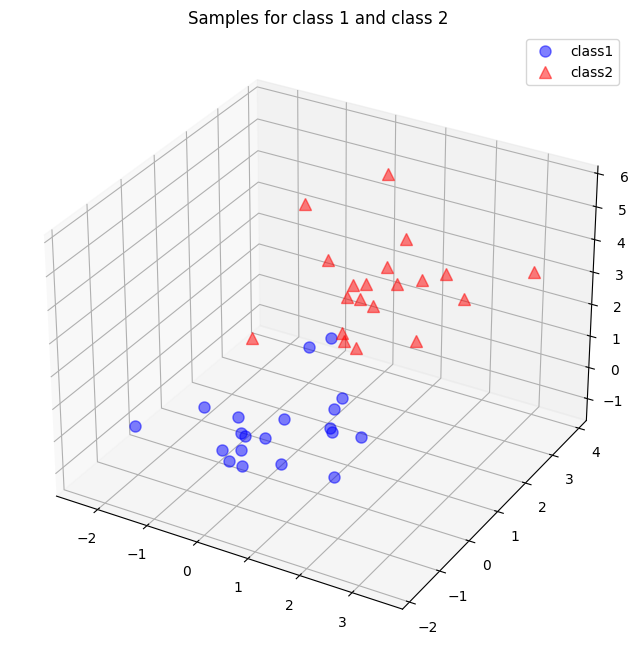

In [ ]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### 1.0 Taking the whole dataset ignoring the class labels
Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [ ]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

### 2.0 Computing the d-dimensional mean vector

In [ ]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.59630221]
 [0.97965616]
 [1.56413655]]


### 3.0 Computing the Scatter Matrix
The scatter matrix is computed by the following equation:
$scatter_{x,y}={\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}$

In [ ]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)


Scatter Matrix:
 [[ 54.75723353  11.26813313  48.82757335]
 [ 11.26813313  75.64598672  54.96761263]
 [ 48.82757335  54.96761263 147.93555804]]


### 3.1 Computing the Covariance Matrix
The covariance matrix is computed by the following equation:
$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [ ]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.40403163 0.28892649 1.25198906]
 [0.28892649 1.93964069 1.40942596]
 [1.25198906 1.40942596 3.79321944]]


### 4.0 Computing eigenvectors and corresponding eigenvalues
To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [ ]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.32930293]
 [-0.42206573]
 [-0.844642  ]]
Eigenvalue 1 from scatter matrix: 194.4392938817473
Eigenvalue 1 from covariance matrix: 4.985622920044801
Scaling factor:  39.000000000000014
----------------------------------------
Eigenvector 2: 
[[-0.76670058]
 [-0.4025919 ]
 [ 0.50008997]]
Eigenvalue 2 from scatter matrix: 28.825701665173003
Eigenvalue 2 from covariance matrix: 0.7391205555172558
Scaling factor:  39.00000000000004
----------------------------------------
Eigenvector 3: 
[[ 0.55111686]
 [-0.8122686 ]
 [ 0.19102334]]
Eigenvalue 3 from scatter matrix: 55.073782744605765
Eigenvalue 3 from covariance matrix: 1.412148275502711
Scaling factor:  39.00000000000002
----------------------------------------


### 5.0 Checking the eigenvector-eigenvalue calculation
Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    print('\n\nscatter.v =\n{}\nlambda.v =\n{}'.format(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv))




scatter.v =
[[ -64.02942934]
 [ -82.06616163]
 [-164.23159349]]
lambda.v =
[[ -64.02942934]
 [ -82.06616163]
 [-164.23159349]]


scatter.v =
[[-22.10068225]
 [-11.60499402]
 [ 14.4154443 ]]
lambda.v =
[[-22.10068225]
 [-11.60499402]
 [ 14.4154443 ]]


scatter.v =
[[ 30.35209039]
 [-44.73470462]
 [ 10.52037819]]
lambda.v =
[[ 30.35209039]
 [-44.73470462]
 [ 10.52037819]]


### Visualizing the eigenvectors
And before we move on to the next step, just to satisfy our own curiosity, we plot the eigenvectors centered at the sample mean.

In [ ]:
# Thanks to Peter Ernst for the 3D arrow code
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

Populating the interactive namespace from numpy and matplotlib


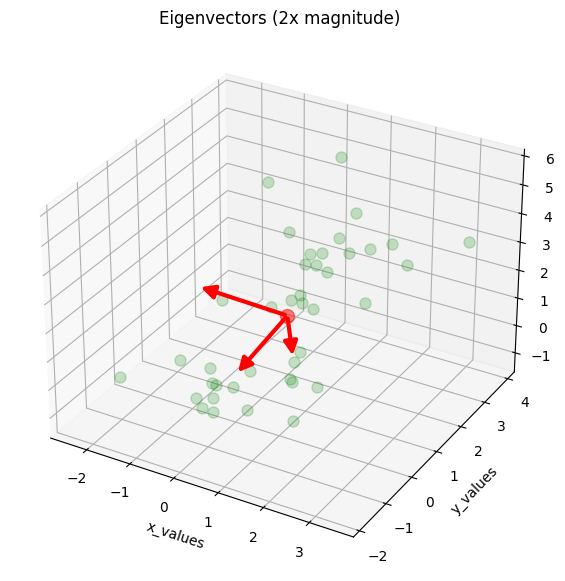

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    ax.arrow3D(mean_x, mean_y, mean_z, 2*v[0], 2*v[1], 2*v[2], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    # ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors (2x magnitude)')

plt.show()

### 5.1. Sorting the eigenvectors by decreasing eigenvalue

In [ ]:
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

194.4392938817473
55.073782744605765
28.825701665173003


### 5.2. Choosing k eigenvectors with the largest eigenvalues

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.32930293  0.55111686]
 [-0.42206573 -0.8122686 ]
 [-0.844642    0.19102334]]


### 6. Transforming the samples onto the new subspace

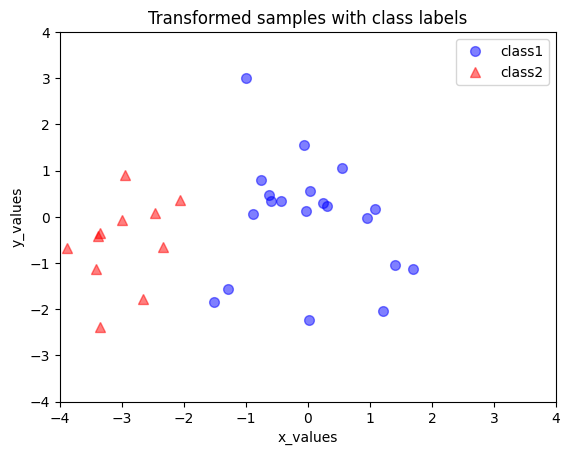

In [ ]:
transformed = matrix_w.T.dot(all_samples)
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Principle Component Analysis (PCA) for iris dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
#print the dataset
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['target']].values

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


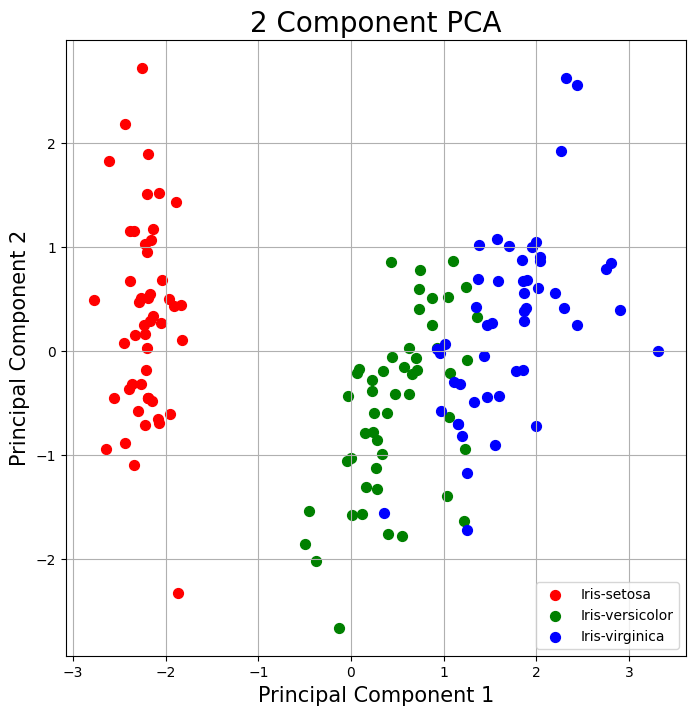

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])